In [182]:
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 10, 8


from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from sklearn.decomposition import PCA

from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.learning_curve import validation_curve
else:
    from sklearn.model_selection import validation_curve
    
from sklearn.externals import joblib

In [183]:
def binary_class(row):
    if row < 0.00:
        return 0
    else:
        return 1

In [184]:
def update_return_class(row, neg_cutoff, pos_cutoff):
    if row <= neg_cutoff:
        return 0
    elif row > neg_cutoff and row < pos_cutoff:
        return 1
    elif row >= pos_cutoff:
        return 2

In [185]:
file = 'data/price_data.csv'
file2 = 'data/price_data_2.csv'
file3 = 'data/price_data_3.csv'
file4 = 'data/price_data_4.csv'
file5 = 'data/price_data_5.csv'
#file6 = 'data/price_data_6.csv'
data = pd.read_csv(file)
data2 = pd.read_csv(file2)
data3 = pd.read_csv(file3)
data4 = pd.read_csv(file4)
data5 = pd.read_csv(file5)
#data6 = pd.read_csv(file6)

data = pd.concat([data, data2, data3, data4, data5], ignore_index=True)

file1 = 'data/price_data_7.csv'
data1 = pd.read_csv(file1)

In [186]:
data.tail(5)

,Date,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F170,F171,F172,F173,F174,F175,F176,F177,F178,F179
18808,2016-10-14,0.321730,0.715899,0.610928,0.248039,0.155750,-0.328270,0.065899,-0.039072,-0.401961,...,1,-1,-1,-1,-1,1,1,1,1,1
18809,2016-10-17,-0.315321,-0.000092,-0.096839,-0.447605,-0.543266,-0.255321,0.059908,-0.036839,-0.387605,...,1,-1,-1,-1,-1,1,1,1,1,-1
18810,2016-10-18,0.380306,0.663553,0.582123,0.248024,0.152362,-0.019694,0.263553,0.182123,-0.151976,...,1,-1,-1,-1,-1,1,1,1,1,-1
18811,2016-10-19,0.315793,0.623230,0.568859,0.259166,0.168976,0.295793,0.603230,0.548859,0.239166,...,1,-1,-1,-1,-1,1,1,1,1,-1
18812,2016-10-20,-0.158827,0.164755,0.135210,-0.150805,-0.235223,0.261173,0.584755,0.555210,0.269195,...,1,-1,-1,-1,-1,1,1,1,1,-1


In [187]:
del data['Date']
del data1['Date']

In [188]:
X5 = data.loc[:,['F75','F76','F77','F79','F82','F83','F85','F86','F87','F89','F90','F91',
                 'F93','F94','F96','F97','F98','F99','F100','F102','F103','F104','F105',
                 'F106','F107','F108','F110','F111','F112','F113','F115','F116','F117',
                 'F158','F159','F160','F161']]
X10 = data.loc[:,['F75','F76','F77','F78','F79','F80','F81','F82','F83','F84','F86','F88',
                  'F89','F90','F91','F92','F93','F94','F95','F96','F97','F98','F99','F100',
                  'F102','F103','F104','F105','F106','F107','F108','F110','F111','F112',
                  'F114','F115','F116','F158','F159','F160','F161']]
X15 = data.loc[:,['F76','F81','F82','F84','F86',
                  'F89','F91','F92','F93','F94','F96','F97','F98','F99','F100','F101'
                  'F102','F103','F104','F105','F106','F108','F110','F111','F112',
                  'F115','F159','F160','F161']]
X20 = data.loc[:,['F81','F83','F84','F85',
                  'F89','F92','F93','F94','F97','F98','F100',
                  'F102','F103','F104','F105','F106','F108','F110','F111','F112',
                  'F160','F161']]
X25 = data.loc[:,['F79','F80','F83','F84','F85',
                  'F89','F90','F92','F93','F94','F95','F96','F97','F98','F99','F100',
                  'F101','F102','F103','F104','F105','F106','F108','F110','F111','F112',
                  'F160','F161']]
X30 = data.loc[:,['F76','F79','F83','F84','F85','F86',
                  'F89','F90','F92','F93','F94','F95','F96','F97','F98','F99','F100',
                  'F101','F102','F103','F104','F105','F106','F108','F110','F111','F112',
                  'F115','F160','F161']]
X30 = data.loc[:,['F75','F76','F77','F78','F79','F80','F81','F82','F83','F84','F105',
                  'F106','F108','F110','F111','F112','F113','F114','F115','F160','F161']]
X30 = data.loc[:,['F75','F76','F77','F78','F79','F108','F112','F113','F114','F160','F161']]
X30 = data.loc[:,['F77','F78','F79','F108','F112','F113','F114','F160','F161']]
X30 = data.loc[:,['F77','F78','F79','F108','F112','F113','F114','F115','F116','F160','F161','F163','F164','F165','F166','F167','F168','F169','F171','F172','F173','F174','F175','F176','F177','F178','F179']]

y5 = data.loc[:,'RET5']
y10 = data.loc[:,'RET10']
y15 = data.loc[:,'RET15']
y20 = data.loc[:,'RET20']
y25 = data.loc[:,'RET25']
y30 = data.loc[:,'RET30']


X1_5 = data1.loc[:,['F75','F76','F77','F79','F82','F83','F85','F86','F87','F89','F90','F91',
                 'F93','F94','F96','F97','F98','F99','F100','F102','F103','F104','F105',
                 'F106','F107','F108','F110','F111','F112','F113','F115','F116','F117',
                 'F158','F159','F160','F161']]
X1_10 = data1.loc[:,['F75','F76','F77','F78','F79','F80','F81','F82','F83','F84','F86','F88',
                  'F89','F90','F91','F92','F93','F94','F95','F96','F97','F98','F99','F100',
                  'F102','F103','F104','F105','F106','F107','F108','F110','F111','F112',
                  'F114','F115','F116','F158','F159','F160','F161']]
X1_15 = data1.loc[:,['F76','F81','F82','F84','F86',
                  'F89','F91','F92','F93','F94','F96','F97','F98','F99','F100','F101'
                  'F102','F103','F104','F105','F106','F108','F110','F111','F112',
                  'F115','F159','F160','F161']]
X1_20 = data1.loc[:,['F81','F83','F84','F85',
                  'F89','F92','F93','F94','F97','F98','F100',
                  'F102','F103','F104','F105','F106','F108','F110','F111','F112',
                  'F160','F161']]
X1_25 = data1.loc[:,['F79','F80','F83','F84','F85',
                  'F89','F90','F92','F93','F94','F95','F96','F97','F98','F99','F100',
                  'F101','F102','F103','F104','F105','F106','F108','F110','F111','F112',
                  'F160','F161']]
X1_30 = data1.loc[:,['F76','F79','F83','F84','F85','F86',
                  'F89','F90','F92','F93','F94','F95','F96','F97','F98','F99','F100',
                  'F101','F102','F103','F104','F105','F106','F108','F110','F111','F112',
                  'F115','F160','F161']]
X1_30 = data1.loc[:,['F75','F76','F77','F78','F79','F80','F81','F82','F83','F84','F105',
                  'F106','F108','F110','F111','F112','F113','F114','F115','F160','F161']]
X1_30 = data1.loc[:,['F75','F76','F77','F78','F79','F108','F112','F113','F114','F160','F161']]
X1_30 = data1.loc[:,['F77','F78','F79','F108','F112','F113','F114','F160','F161']]
X1_30 = data1.loc[:,['F77','F78','F79','F108','F112','F113','F114','F115','F116','F160','F161','F163','F164','F165','F166','F167','F168','F169','F171','F172','F173','F174','F175','F176','F177','F178','F179']]

y1_5 = data1.loc[:,'RET5']
y1_10 = data1.loc[:,'RET10']
y1_15 = data1.loc[:,'RET15']
y1_20 = data1.loc[:,'RET20']
y1_25 = data1.loc[:,'RET25']
y1_30 = data1.loc[:,'RET30']

In [190]:
y30.columns = ['RET']
y1_30.columns = ['RET']

y30_b = pd.Series(index=y5.index)
y1_30b = pd.Series(index=y1_5.index)

y30_b = y30.apply(binary_class)
y1_30b = y1_30.apply(binary_class)
#et = RandomForestClassifier()
#et = XGBClassifier()
#et = ExtraTreesClassifier()
et = GradientBoostingClassifier()

et.fit(X30,y30_b)
predict = et.predict(X1_30)

print(accuracy_score(y1_30b, predict))
print(confusion_matrix(y1_30b, predict))
print(classification_report(y1_30b, predict))

0.617405147254
[[ 168 1230]
 [ 212 2159]]
             precision    recall  f1-score   support

          0       0.44      0.12      0.19      1398
          1       0.64      0.91      0.75      2371

avg / total       0.56      0.62      0.54      3769



In [191]:
model_file = 'models/final_model.mod'
joblib.dump(et, model_file, compress=1)

['models/final_model.mod']

In [116]:
y5.columns = ['RET']
y10.columns = ['RET']
y15.columns = ['RET']
y20.columns = ['RET']
y25.columns = ['RET']
y30.columns = ['RET']

In [58]:
y5_b = pd.Series(index=y5.index)
y10_b = pd.Series(index=y5.index)
y15_b = pd.Series(index=y5.index)
y20_b = pd.Series(index=y5.index)
y25_b = pd.Series(index=y5.index)
y30_b = pd.Series(index=y5.index)

y5_b = y5.apply(binary_class)
y10_b = y10.apply(binary_class)
y15_b = y15.apply(binary_class)
y20_b = y20.apply(binary_class)
y25_b = y25.apply(binary_class)
y30_b = y30.apply(binary_class)

In [59]:
y1_5.columns = ['RET']
y1_10.columns = ['RET']
y1_15.columns = ['RET']
y1_20.columns = ['RET']
y1_25.columns = ['RET']
y1_30.columns = ['RET']

y1_5b = pd.Series(index=y1_5.index)
y1_10b = pd.Series(index=y1_5.index)
y1_15b = pd.Series(index=y1_5.index)
y1_20b = pd.Series(index=y1_5.index)
y1_25b = pd.Series(index=y1_5.index)
y1_30b = pd.Series(index=y1_5.index)

y1_5b = y1_5.apply(binary_class)
y1_10b = y1_10.apply(binary_class)
y1_15b = y1_15.apply(binary_class)
y1_20b = y1_20.apply(binary_class)
y1_25b = y1_25.apply(binary_class)
y1_30b = y1_30.apply(binary_class)

In [60]:
y5_t = pd.Series(index=y5.index)
y10_t = pd.Series(index=y5.index)
y15_t = pd.Series(index=y5.index)
y20_t = pd.Series(index=y5.index)
y25_t = pd.Series(index=y5.index)
y30_t = pd.Series(index=y5.index)

y5_t = y5.apply(update_return_class, args=(-0.02, 0.02))
y10_t = y10.apply(update_return_class, args=(-0.03, 0.03))
y15_t = y15.apply(update_return_class, args=(-0.05, 0.05))
y20_t = y20.apply(update_return_class, args=(-0.05, 0.05))
y25_t = y25.apply(update_return_class, args=(-0.05, 0.07))
y30_t = y30.apply(update_return_class, args=(-0.05, 0.08))

In [ ]:
yt5_t = pd.Series(index=y1_5.index)
yt10_t = pd.Series(index=y1_5.index)
yt15_t = pd.Series(index=y1_5.index)
yt20_t = pd.Series(index=y1_5.index)
yt25_t = pd.Series(index=y1_5.index)
yt30_t = pd.Series(index=y1_5.index)

yt5_t = yt5.apply(update_return_class, args=(-0.02, 0.02))
yt10_t = yt10.apply(update_return_class, args=(-0.03, 0.03))
yt15_t = yt15.apply(update_return_class, args=(-0.05, 0.05))
yt20_t = yt20.apply(update_return_class, args=(-0.05, 0.05))
yt25_t = yt25.apply(update_return_class, args=(-0.05, 0.07))
yt30_t = yt30.apply(update_return_class, args=(-0.05, 0.08))

In [54]:
validation_size = 0.20
seed = 7

X5b_train, X5b_test, Y5b_train, Y5b_test = cross_validation.train_test_split(X5, y5_b, test_size=validation_size,random_state=seed)
X10b_train, X10b_test, Y10b_train, Y10b_test = cross_validation.train_test_split(X10, y10_b, test_size=validation_size, random_state=seed)
X15b_train, X15b_test, Y15b_train, Y15b_test = cross_validation.train_test_split(X15, y15_b, test_size=validation_size, random_state=seed)
X20b_train, X20b_test, Y20b_train, Y20b_test = cross_validation.train_test_split(X20, y20_b, test_size=validation_size, random_state=seed)
X25b_train, X25b_test, Y25b_train, Y25b_test = cross_validation.train_test_split(X25, y25_b, test_size=validation_size, random_state=seed)
X30b_train, X30b_test, Y30b_train, Y30b_test = cross_validation.train_test_split(X30, y30_b, test_size=validation_size, random_state=seed)

#X5t_train, X5t_test, Y5t_train, Y5t_test = cross_validation.train_test_split(X1_5, y5_t, test_size=validation_size, 
#                                                                                 random_state=seed)
#X10t_train, X10t_test, Y10t_train, Y10t_test = cross_validation.train_test_split(X1_10, y10_t, test_size=validation_size, 
#                                                                                 random_state=seed)
#X15t_train, X15t_test, Y15t_train, Y15t_test = cross_validation.train_test_split(X1_15, y15_t, test_size=validation_size, 
#                                                                                 random_state=seed)
#X20t_train, X20t_test, Y20t_train, Y20t_test = cross_validation.train_test_split(X1_20, y20_t, test_size=validation_size, 
#                                                                                 random_state=seed)
#X25t_train, X25t_test, Y25t_train, Y25t_test = cross_validation.train_test_split(X1_25, y25_t, test_size=validation_size, 
#                                                                                 random_state=seed)
#X30t_train, X30t_test, Y30t_train, Y30t_test = cross_validation.train_test_split(X1_30, y30_t, test_size=validation_size, 
#                                                                                 random_state=seed)

In [30]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
scoring = 'f1_weighted'

In [31]:
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()

In [ ]:
stdsc5b = StandardScaler()
stdsc10b = StandardScaler()
stdsc15b = StandardScaler()
stdsc20b = StandardScaler()
stdsc25b = StandardScaler()
stdsc30b = StandardScaler()

X5b_train_std = stdsc5b.fit_transform(X5b_train)
X5b_test_std = stdsc5b.transform(X5b_test)

X10b_train_std = stdsc10b.fit_transform(X10b_train)
X10b_test_std = stdsc10b.transform(X10b_test)

X15b_train_std = stdsc15b.fit_transform(X15b_train)
X15b_test_std = stdsc15b.transform(X15b_test)

X20b_train_std = stdsc20b.fit_transform(X20b_train)
X20b_test_std = stdsc20b.transform(X20b_test)

X25b_train_std = stdsc25b.fit_transform(X25b_train)
X25b_test_std = stdsc25b.transform(X25b_test)

X30b_train_std = stdsc30b.fit_transform(X30b_train)
X30b_test_std = stdsc30b.transform(X30b_test)

stdsc5t = StandardScaler()
stdsc10t = StandardScaler()
stdsc15t = StandardScaler()
stdsc20t = StandardScaler()
stdsc25t = StandardScaler()
stdsc30t = StandardScaler()

X5t_train_std = stdsc5t.fit_transform(X5t_train)
X5t_test_std = stdsc5t.transform(X5t_test)

X10t_train_std = stdsc10t.fit_transform(X10t_train)
X10t_test_std = stdsc10t.transform(X10t_test)

X15t_train_std = stdsc15t.fit_transform(X15t_train)
X15t_test_std = stdsc15t.transform(X15t_test)

X20t_train_std = stdsc20t.fit_transform(X20t_train)
X20t_test_std = stdsc20t.transform(X20t_test)

X25t_train_std = stdsc25t.fit_transform(X25t_train)
X25t_test_std = stdsc25t.transform(X25t_test)

X30t_train_std = stdsc30t.fit_transform(X30t_train)
X30t_test_std = stdsc30t.transform(X30t_test)

In [ ]:
X_train = X30b_train
Y_train = Y30b_train
num_instances = len(X_train)
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier(n_estimators=250))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=250, max_depth=25))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=250, max_depth=25))])))
ensembles.append(('ScaledET', Pipeline([('ET', ExtraTreesClassifier(n_estimators=250, max_depth=25))])))
#ensembles.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier())])))
#ensembles.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
results = []
names = []
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for name, model in ensembles:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [61]:
et = RandomForestClassifier()
#et = XGBClassifier()
#et = ExtraTreesClassifier()
#et = GradientBoostingClassifier()

et.fit(X30,y30_b)
predict = et.predict(X1_30)

print(accuracy_score(y1_30b, predict))
print(confusion_matrix(y1_30b, predict))
print(classification_report(y1_30b, predict))

0.541167066347
[[ 237 1466]
 [ 256 1794]]
             precision    recall  f1-score   support

          0       0.48      0.14      0.22      1703
          1       0.55      0.88      0.68      2050

avg / total       0.52      0.54      0.47      3753



In [424]:
X_train.columns

Index(['F76', 'F79', 'F83', 'F84', 'F85', 'F86', 'F89', 'F90', 'F92', 'F93',
       'F94', 'F95', 'F96', 'F97', 'F98', 'F99', 'F100', 'F101', 'F102',
       'F103', 'F104', 'F105', 'F106', 'F108', 'F110', 'F111', 'F112', 'F115',
       'F160', 'F161'],
      dtype='object')

In [23]:
Xt10b_train, Xt10b_test, Yt10b_train, Yt10b_test = cross_validation.train_test_split(X1_10, y1_10b, test_size=validation_size, 
                                                                                 random_state=seed)

Xt15b_train, Xt15b_test, Yt15b_train, Yb15t_test = cross_validation.train_test_split(X1_15, y1_15b, test_size=validation_size, 
                                                                                 random_state=seed)

Xt20b_train, Xt20b_test, Yt20b_train, Yt20b_test = cross_validation.train_test_split(X1_20, y1_20b, test_size=validation_size, 
                                                                                 random_state=seed)

#Xt10b_std = stdsc10b.transform(Xt10b_train)
#Xt10t_std = stdsc10t.transform(Xt10t_train)
#Xt15t_std = stdsc15t.transform(Xt15t_train)
#Xt20t_std = stdsc20t.transform(Xt20t_train)

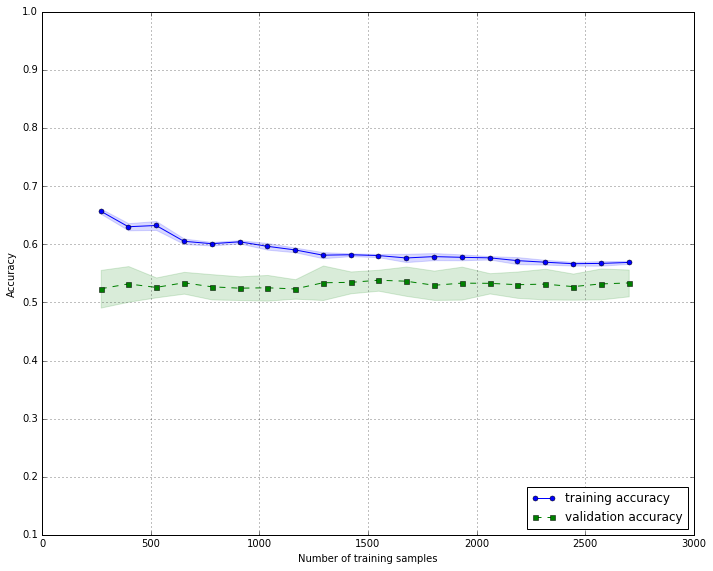

In [21]:
num_instances = len(X_train)
X_train = Xt10b_train
Y_train = Yt10b_train
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesClassifier(n_estimators=250, max_depth=25))])

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', AdaBoostClassifier())])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=Y_train,
                               train_sizes=np.linspace(0.1, 1.0, 20),
                               cv=kfold,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.1, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

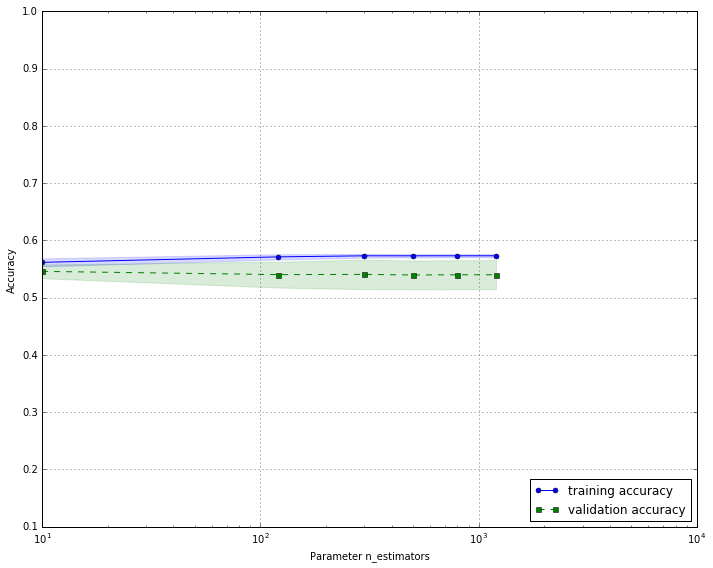

In [22]:
param_range = [10, 120, 300, 500, 800, 1200]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=Y_train, 
                param_name='clf__n_estimators', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_estimators')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

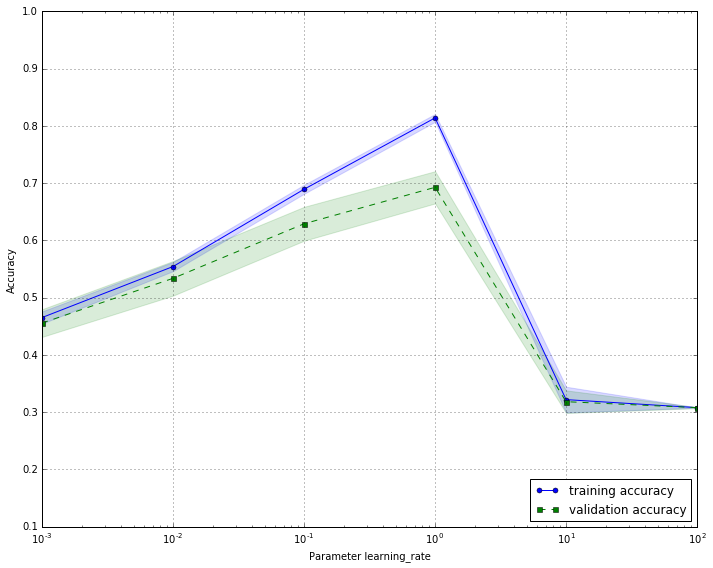

In [37]:
#param_range = [5, 8, 15, 25, 30]
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', AdaBoostClassifier(n_estimators=1000))])
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=Y_train, 
                #param_name='clf__max_depth', 
                param_name='clf__learning_rate', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
#plt.xlabel('Parameter max_depth')
plt.xlabel('Parameter learning_rate')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

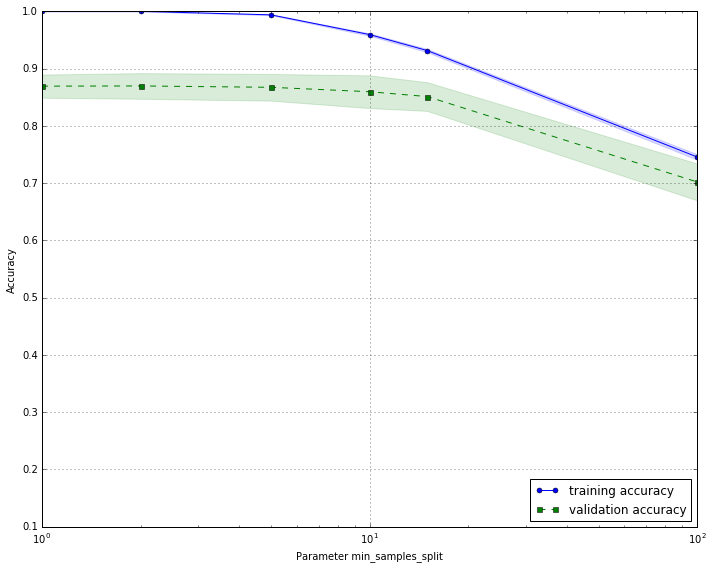

In [26]:
param_range = [1, 2, 5, 10, 15, 100]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=Y_train, 
                param_name='clf__min_samples_split', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter min_samples_split')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

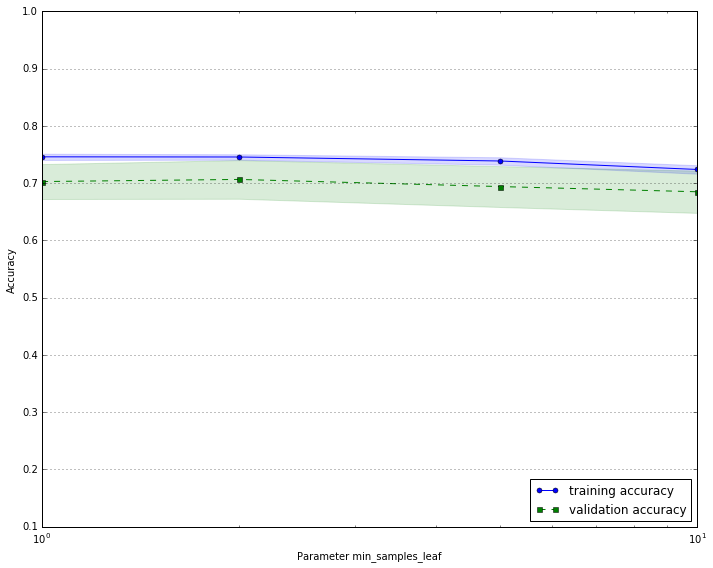

In [28]:
param_range = [1, 2, 5, 10]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=Y_train, 
                param_name='clf__min_samples_leaf', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter min_samples_leaf')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

In [45]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesClassifier(n_estimators=250, max_depth=25))])
Y_test = Y30t_test
X_test = X30t_test
X_train = X30t_train
Y_train = Y30t_train
pipe_lr.fit(X_train, Y_train)
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print(confmat)

[[205  20   0]
 [ 25 187  18]
 [  0  17 271]]


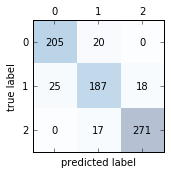

In [46]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()